In [63]:
from tensorflow.keras import layers 
from tensorflow import keras

In [103]:
import opendatasets as od

In [104]:
od.download("https://www.kaggle.com/mikaelstrauhs/airbus-ship-detection-train-set-30") #завантаження тренувальних фото

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zavalniuk
Your Kaggle Key: ········


2021-10-13 20:57:19,498 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError(0, 'Error'))': /api/v1/datasets/download/mikaelstrauhs/airbus-ship-detection-train-set-30


100%|█████████████████████████████████████████████████████████████████████████████| 7.93G/7.93G [23:18<00:00, 6.09MB/s]


In [ ]:
#завантаження моделі

In [115]:
import gdown

url = 'https://drive.google.com/uc?id=17bM_Pbr9QIGyV5vXCWCd91p3RT2v1GI8'
output = 'oxford_segmentation.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17bM_Pbr9QIGyV5vXCWCd91p3RT2v1GI8
To: C:\Users\user\oxford_segmentation.h5
100%|█████████████████████████████████████████████████████████████████████████████| 16.8M/16.8M [00:03<00:00, 5.40MB/s]


'oxford_segmentation.h5'

In [107]:
import os
import PIL
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import cv2
from PIL import ImageOps
from pathlib import Path
input_dir="airbus-ship-detection-train-set-30/test_v3/test_v2/Images"
img_size = (128, 128)
num_classes = 2
batch_sizez = 1000
#для списку фото
input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
       for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
input_img_paths.sort()
print("Number of samples:", len(input_img_paths))
inp=[]
list(set(input_img_paths))
for input_path in zip(input_img_paths[:10]):
    print(input_path)
for ff in range(0,len(input_img_paths)):
        inp.append(input_img_paths[ff].replace("airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\", ""))

Number of samples: 57767
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\00003e153.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\0001b1832.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\00021ddc3.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\0002d0f32.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\00031f145.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\0005d01c8.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\0005d6d95.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\0006c52e8.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\0007b8229.jpg',)
('airbus-ship-detection-train-set-30/test_v3/test_v2/Images\\0008d6216.jpg',)


In [33]:
список фото для передбачень
def getx(odyn, dva):
  xx = np.zeros((dva-odyn,) + (128,128) + (3,), dtype="float32")
  count2=0
  for j in range (odyn,dva):
          img =PIL.ImageOps.autocontrast(load_img(input_img_paths[j], target_size=(128,128,3)))
          img=np.array(img)
          img2 = (img - np.min(img))/np.ptp(img)
          xx[count2] = np.array(img2)
          count2+=1
  return xx

In [116]:
model = keras.models.load_model("oxford_segmentation.h5")

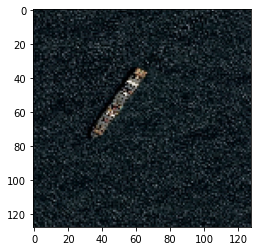

In [72]:
xx=getx(0,100)
plt.imshow(xx[7])

(1, 128, 128, 1)


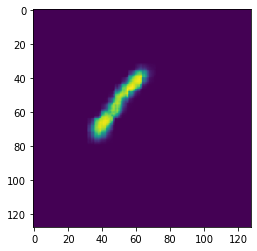

In [117]:
#здійснюємо передбачення
import numpy as np
import matplotlib.pyplot as plt
xx=getx(0,100)
xx5=xx[7].reshape(1,128,128,3)
img=np.array(model.predict(xx5))
print(img.shape)
nump=np.zeros((128,128))
img=img.reshape(128,128,)
plt.imshow(img)

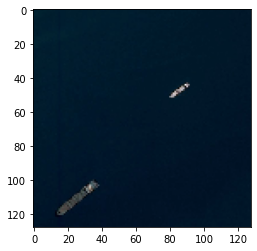

In [69]:
plt.imshow(xx[5])

(1, 128, 128, 1)


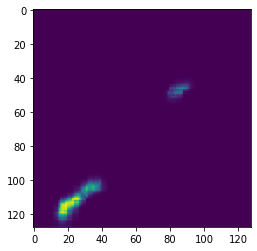

In [108]:
xx=getx(0,100)
xx5=xx[5].reshape(1,128,128,3)
img=np.array(model.predict(xx5))
print(img.shape)
nump=np.zeros((128,128))
img=img.reshape(128,128,)
plt.imshow(img)

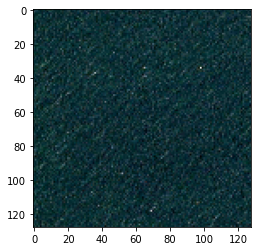

In [109]:
plt.imshow(xx[15])

(1, 128, 128, 1)


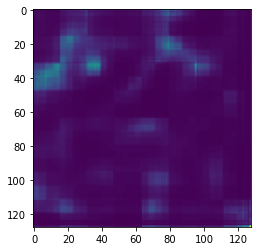

In [110]:
xx5=xx[15].reshape(1,128,128,3)
img=np.array(model.predict(xx5))
print(img.shape)
nump=np.zeros((128,128))
img=img.reshape(128,128,)
plt.imshow(img)